
 ### **Task 1: Training a DQN Agent on the Racetrack Environment**
- Implement a **Deep Q-Network (DQN) agent from scratch** using the provided configuration file (`config.py`).
- Documentation on https://highway-env.farama.org/
- The training process should be documented, including:
  - Observations of different learning phases.
  - Performance evaluation of the trained agent.
  - Analysis of achieved rewards and behavior.


## 0 - Imports

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
import numpy as np

from configs.config import config_dict

## 1 - DQN training  

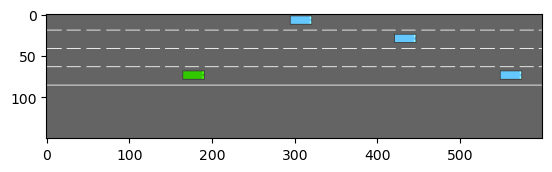

In [2]:
# Create and configure environment
env = gym.make("highway-fast-v0", render_mode="rgb_array")
env.unwrapped.configure(config_dict)  # Use unwrapped environment to configure
env.reset()
plt.imshow(env.render())
plt.show()

In [3]:

import matplotlib.pyplot as plt
from dqn_from_scratch import DQNAgent, train_dqn_agent

# Default hyperparameters (can be adjusted)
config = {
    'hidden_dim': 256,           # Size of hidden layers in Q-network
    'lr': 3e-4,                  # Learning rate
    'buffer_size': 100000,       # Replay buffer size
    'batch_size': 64,            # Batch size for training
    'gamma': 0.99,              # Discount factor
    'epsilon_start': 1.0,       # Initial exploration rate
    'epsilon_end': 0.01,        # Minimum exploration rate
    'epsilon_decay': 20000,      # Steps over which to decay epsilon
    'target_update': 1000       # Steps between target network updates
}

# Initialize environment and agent
env = gym.make("highway-fast-v0", render_mode="rgb_array")
env.reset()

agent = DQNAgent(env, config)

# Start training
stats = train_dqn_agent(env, agent, config, n_episodes=20000)


Initialized DQN Agent with state dim: (5, 5), action dim: 5
Starting training...
Episode   10 | Reward:   21.9 | Avg Reward (10):    8.5 | Length:  30 | Loss:   0.14 | Epsilon: 0.997
Episode   20 | Reward:   21.6 | Avg Reward (10):    7.7 | Length:  30 | Loss:   0.08 | Epsilon: 0.992
Episode   30 | Reward:    5.8 | Avg Reward (10):    6.2 | Length:   8 | Loss:   0.07 | Epsilon: 0.988
Episode   40 | Reward:    3.4 | Avg Reward (10):    9.8 | Length:   5 | Loss:   0.06 | Epsilon: 0.982
Episode   50 | Reward:    2.4 | Avg Reward (10):    9.0 | Length:   4 | Loss:   0.06 | Epsilon: 0.976
Episode   60 | Reward:    3.4 | Avg Reward (10):    4.7 | Length:   5 | Loss:   0.07 | Epsilon: 0.972
Episode   70 | Reward:    3.8 | Avg Reward (10):   10.3 | Length:   5 | Loss:   0.07 | Epsilon: 0.966
Episode   80 | Reward:    2.8 | Avg Reward (10):    5.7 | Length:   4 | Loss:   0.07 | Epsilon: 0.962
Episode   90 | Reward:   22.8 | Avg Reward (10):   14.4 | Length:  30 | Loss:   0.07 | Epsilon: 0.952
E

### Description of training techniques :  
**Architecture of the DQN** :  
bla bla  
**Training** :  
bla bla  
**Monitoring** :  
bla bla

## 2 - Observation of different learning phases

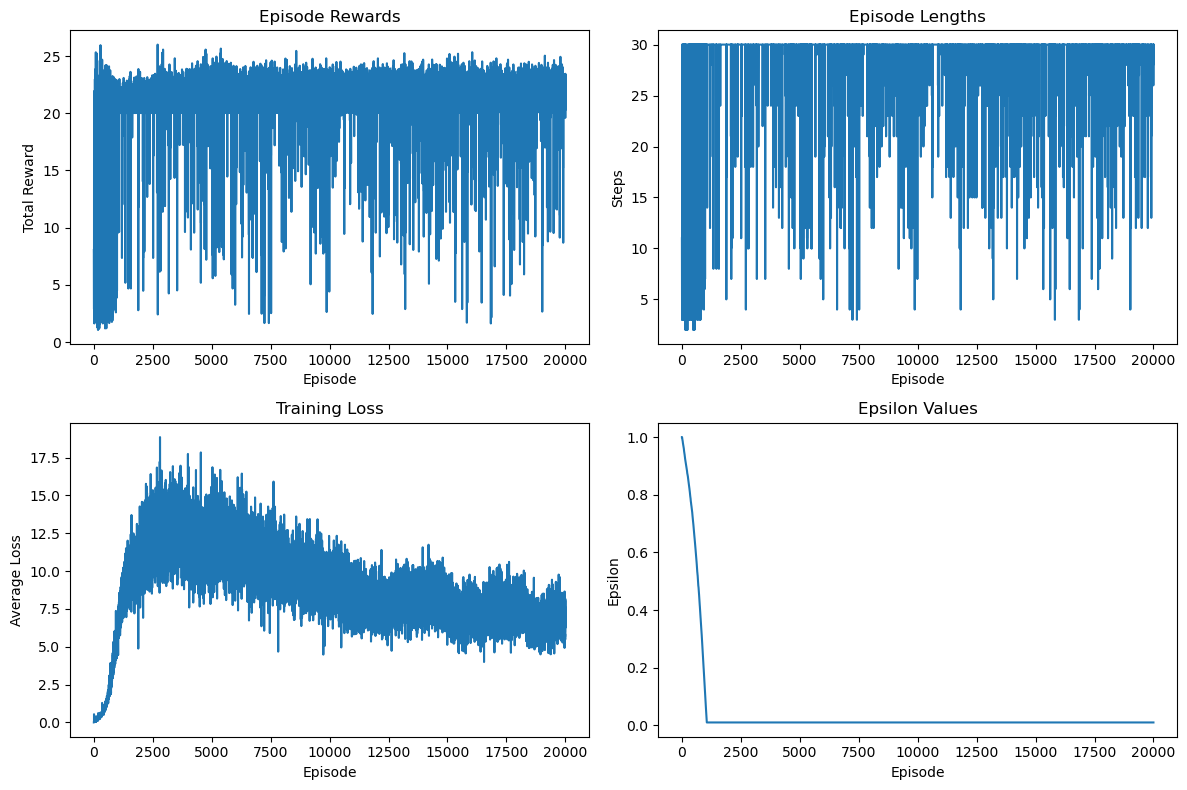

In [4]:
# Plot training results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(stats['episode'], stats['reward'])
plt.title('Episode Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(2, 2, 2)
plt.plot(stats['episode'], stats['length'])
plt.title('Episode Lengths')
plt.xlabel('Episode')
plt.ylabel('Steps')

plt.subplot(2, 2, 3)
plt.plot(stats['episode'], stats['loss'])
plt.title('Training Loss')
plt.xlabel('Episode')
plt.ylabel('Average Loss')

plt.subplot(2, 2, 4)
plt.plot(stats['episode'], stats['epsilon'])
plt.title('Epsilon Values')
plt.xlabel('Episode')
plt.ylabel('Epsilon')

plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()

## 3 - Performance evaluation of the trained agent

In [ ]:
# Load agent
agent.load_model('models/dqn_final.pth')

In [5]:
# Performance evaluation of the model

def evaluate_agent(env, agent, n_episodes=100):
    total_rewards = []
    n_successes = 0
    for episode in range(n_episodes):
        print(f"Evaluating episode {episode + 1}/{n_episodes}", end='\r')
        obs, info = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = agent.get_action(obs)
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward
        total_rewards.append(total_reward)
        if info["crashed"] == False:
            n_successes += 1

    return np.mean(total_rewards), np.std(total_rewards), n_successes / n_episodes

# Evaluate the agent
mean_reward, std_reward, success_rate = evaluate_agent(env, agent, n_episodes=100)
print(f"Mean Reward: {mean_reward:.2f} ± {std_reward:.2f}")
print(f"Success Rate: {success_rate:.2%}")

Mean Reward: 21.64 ± 2.010
Success Rate: 97.00%


## 4 - Analysis of achieved rewards and behavior

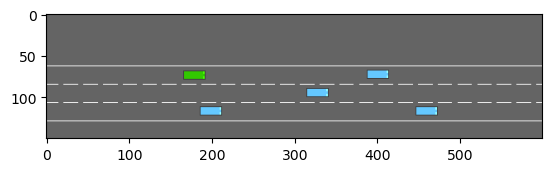

In [14]:
from IPython.display import clear_output

# Display a run of the agent

env.reset()

# Display the environment running
for _ in range(100):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()
    if terminated:
        env.reset()